1. Check meta data
2. Screen data (print some images from all direction) 
3. Plot some time series

In [21]:
import os
import nibabel as nib 
import matplotlib.pyplot as plt
import numpy as np
sub = "01"
base_path = f"/data/sub-{sub}/"

In [22]:
anat_path = f"{base_path}anat/sub-{sub}_T1w.nii"

task = "task-localizer"
func_path = f"{base_path}func/sub-{sub}_{task}_bold.nii.gz"

# Header

In [19]:
anat = nib.load(anat_path)
print(anat.shape)
print(anat.header.get_zooms())
print(anat.header.get_xyzt_units())

(192, 256, 256)
(1.0, 1.0, 1.0)
('mm', 'sec')


In [20]:
func = nib.load(func_path)
print(func.shape)
print(func.header.get_zooms())
print(func.header.get_xyzt_units())

(64, 64, 38, 633)
(3.0, 3.0, 3.45, 1.296)
('mm', 'sec')


# Data

In [24]:
anat_data = anat.get_fdata()
print(type(anat_data))
print(anat_data.shape)

<class 'numpy.ndarray'>
(192, 256, 256)


In [25]:
mid_voxel = anat_data[94:97, 125:128, 125:128]

(192, 256)


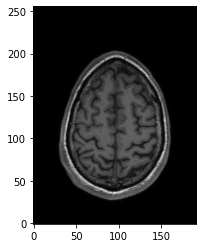

In [37]:
slice_data = anat_data[:, :, 200]
print(slice_data.shape)
plt.imshow(slice_data.T, cmap='gray', origin='lower')

In [38]:
def plot_skim(data, slices, data_type='anat', fix_dim_value=1000):
    fig, axs = plt.subplots(slices.shape[0] // 4 +1, 4, figsize=(10, 13), sharex=True, sharey=True)

    i = 0
    k = 0

    for s in slices:
        if data_type=='anat':
            slice_data = data[:, :, s]
        elif data_type=='func':
            slice_data = data[fix_dim_value,: ,:, s]
        
        im = axs[i, k].imshow(slice_data.T, cmap='gray', origin='lower')
        axs[i, k].set_title(f"Slice {s}")
        axs[i,k].axis('off')

        if k + 1 < 4:
            k += 1
        else:
            k = 0
            i += 1

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.tight_layout()
    plt.show()

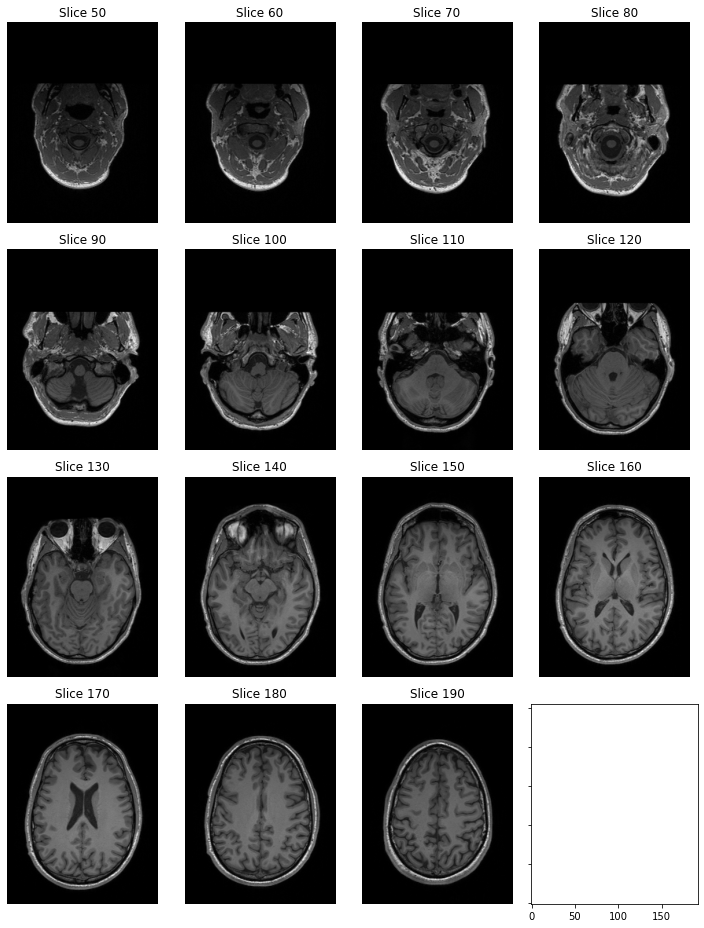

In [39]:
slices = np.arange(50, 200, 10)
plot_skim(anat_data, slices)

In [59]:
func_data = func.get_fdata()

In [60]:
func_data.shape

(64, 64, 38, 633)

IndexError: index 700 is out of bounds for axis 3 with size 633

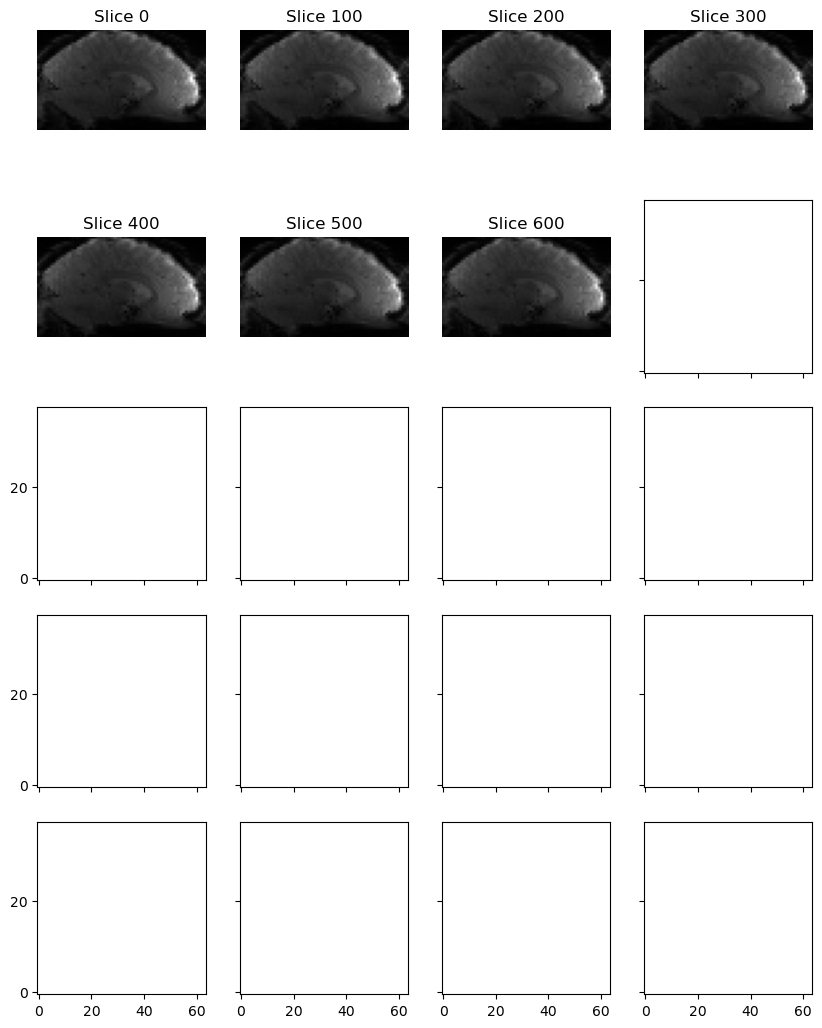

In [61]:
slices = np.arange(0, 1800, 100)
plot_skim(func_data, slices, data_type='func', fix_dim_value=30)

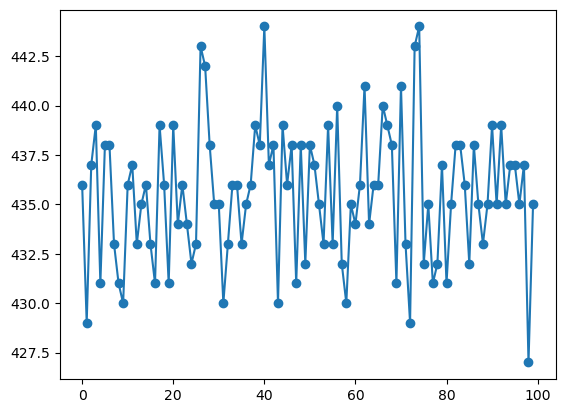

In [62]:
# voxel activity
voxel = func_data[38, 30, 25, :]
plt.plot(voxel[:100], 'o-')

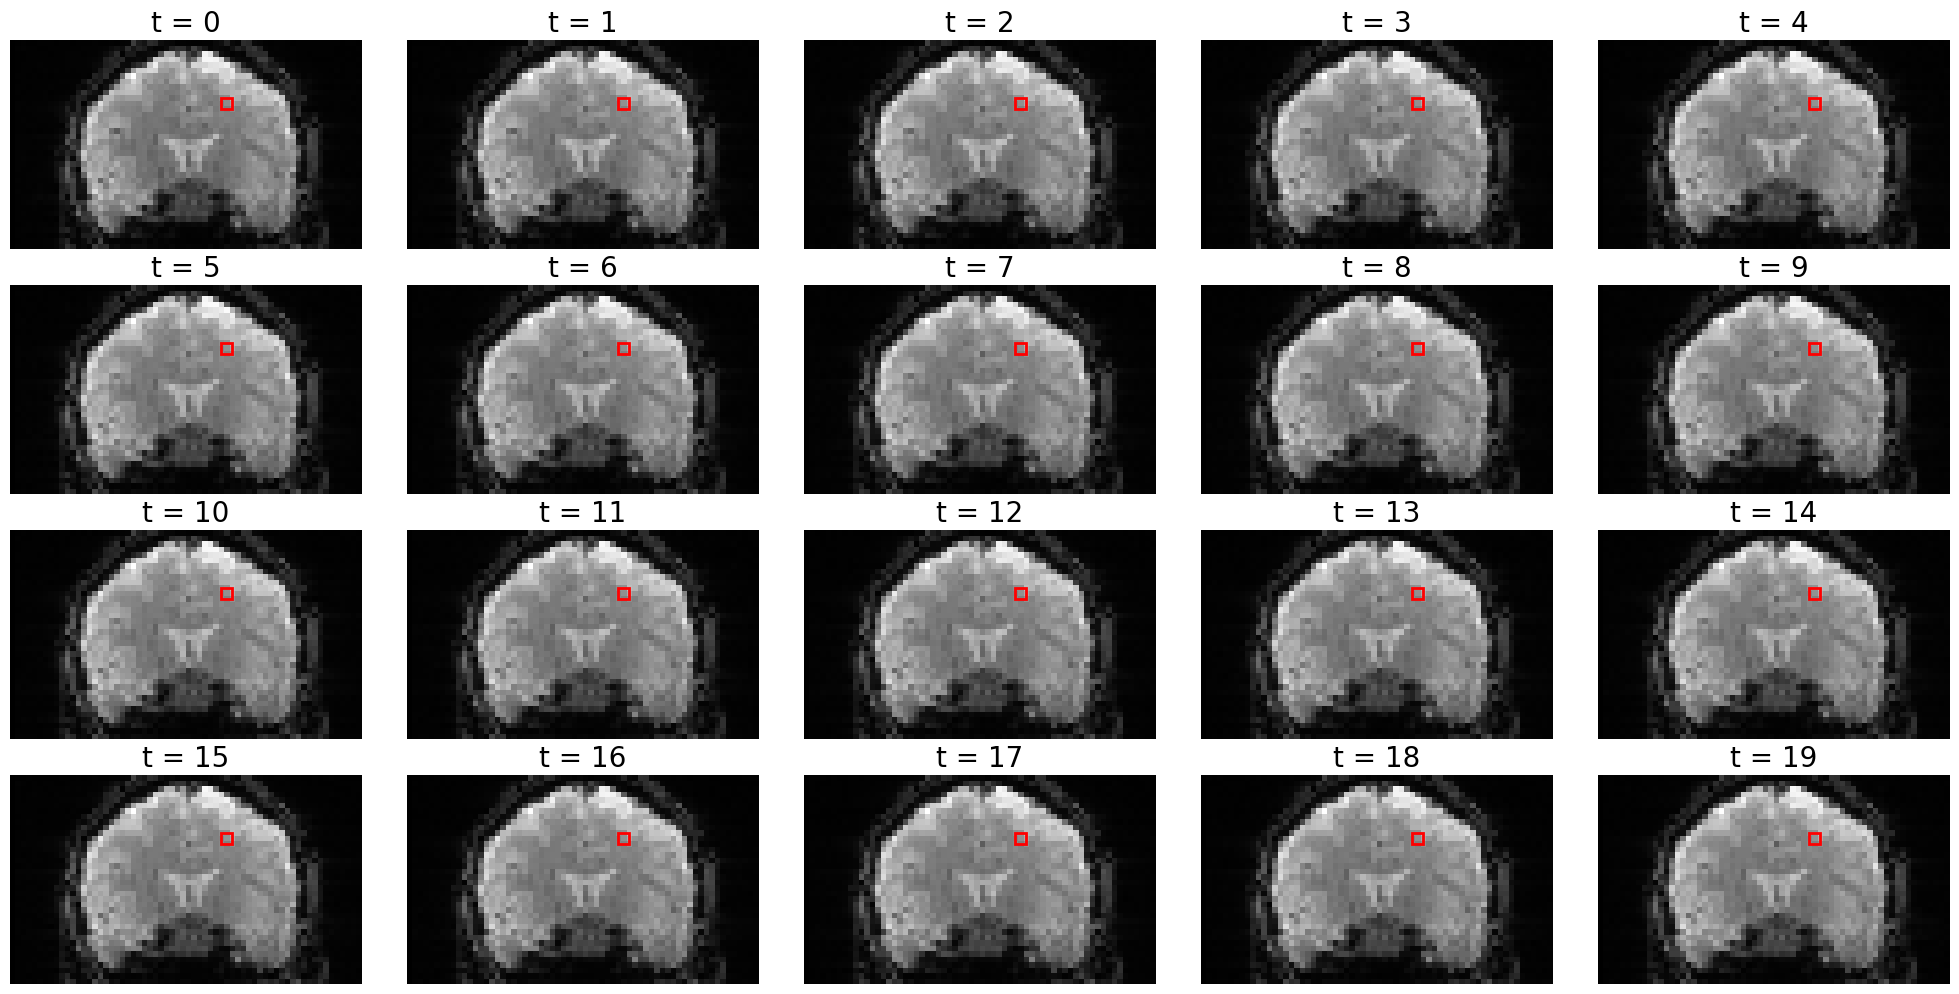

In [63]:
from matplotlib import patches

fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))  # 20 timepoints
# Loop over the first 20 volumes/timepoints
for t, ax in enumerate(axes.flatten()):    
    ax.imshow(func_data[:, 39 , :, t].T, cmap='gray', origin='lower')  # index with t!
    rect = patches.Rectangle((38, 25), 2, 2, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('off')
    ax.set_title('t = %i' % t, fontsize=20)
fig.tight_layout()

# JSON

In [64]:
import json
json_path = f'{base_path}func/sub-{sub}_{task}_bold.json'
with open(json_path, 'r') as file:
    content = file.read()
    json_data = json.loads(content)

In [65]:
json_data['time']['samples'].keys()

dict_keys(['AcquisitionNumber', 'AcquisitionTime', 'ContentTime', 'InstanceCreationTime', 'InstanceNumber', 'LargestImagePixelValue', 'WindowCenter', 'WindowWidth'])

# TSV

In [66]:
import pandas as pd
tsv_path = f'{base_path}func/sub-{sub}_{task}_events.tsv'
tsv_data = pd.read_csv(tsv_path, sep='\t')

In [67]:
tsv_data

,onset,duration,trial_type,response_time,stim_file,TODO -- fill in rows and add more tab-separated columns if desired
